## 텐서플로우로 분류 모델 만들기
* [첫 번째 신경망 훈련하기: 기초적인 분류 문제  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["Insulin"] = df["Insulin"].replace(0, np.nan)

In [5]:
Insulin_median = df.groupby("Outcome")["Insulin"].median()
Insulin_median[0]

102.5

In [6]:
df.loc[df["Outcome"] == 0, "Insulin"] = Insulin_median[0]
df.loc[df["Outcome"] == 1, "Insulin"] = Insulin_median[1]

In [7]:
train = df.sample(frac=0.8,random_state=0)
test = df.drop(train.index)

train.shape, test.shape

((614, 9), (154, 9))

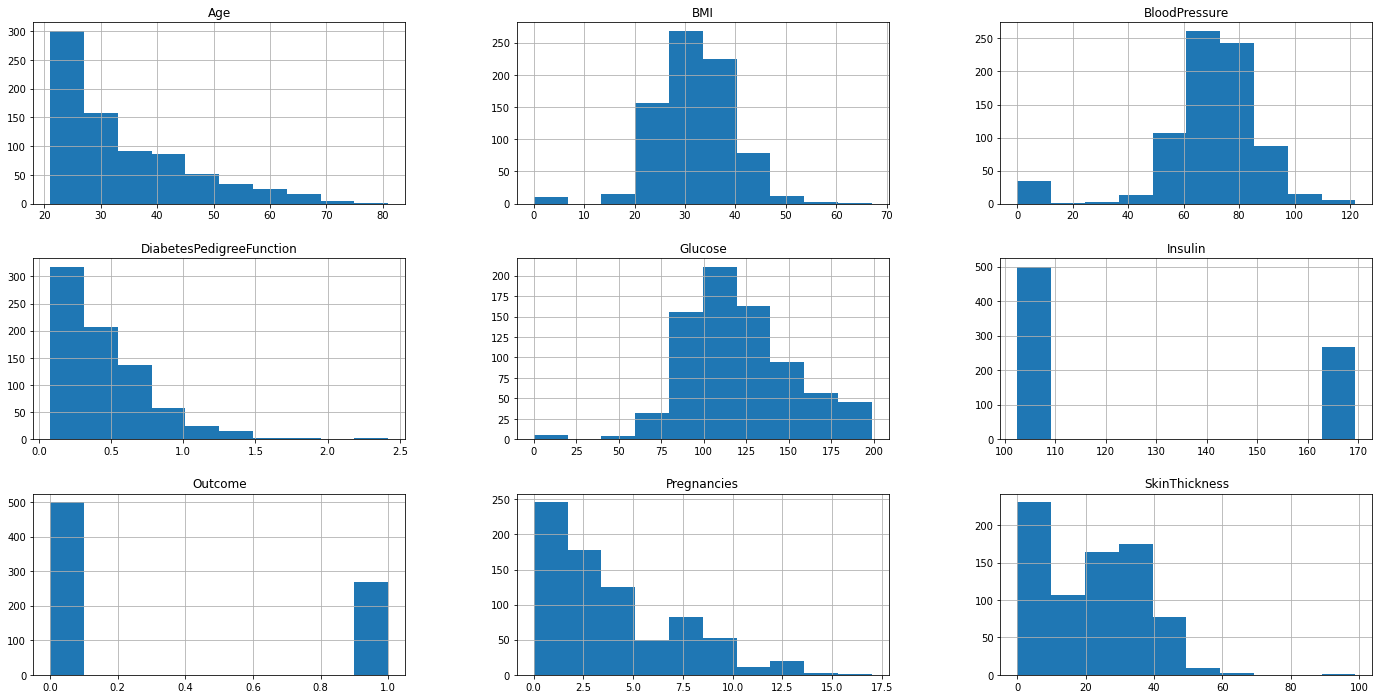

In [8]:
h = df.hist(figsize=(24, 12))

In [9]:
label_name = "Outcome"

In [10]:
X_train = train.drop(label_name, axis=1)
y_train = train[label_name]

X_train.shape, y_train.shape

((614, 8), (614,))

In [11]:
X_test = test.drop(label_name, axis=1)
y_test = test[label_name]

X_test.shape, y_test.shape

((154, 8), (154,))

In [12]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
212,7,179,95,31,102.5,34.2,0.164,60,0


In [13]:
data = df.drop(label_name, axis=1)
input_shape = data.shape[1]
# input_shape

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(input_shape)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax') # sigmoid, softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, 
            epochs=100,
            use_multiprocessing=True,
            verbose=0)

In [16]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[8.8045484e-04, 9.9911958e-01],
       [7.1387659e-03, 9.9286121e-01],
       [1.1382884e-02, 9.8861712e-01],
       [1.1920735e-03, 9.9880791e-01],
       [9.9995828e-01, 4.1668758e-05]], dtype=float32)

In [17]:
y_pred[0]

array([8.8045484e-04, 9.9911958e-01], dtype=float32)

In [18]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

5/5 - 0s - loss: 0.2641 - accuracy: 0.9091

테스트 정확도: 0.9090909361839294


In [19]:
y_predict = np.argmax(y_pred, axis=1)
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [20]:
(y_test == y_predict).mean()

0.9090909090909091